In [17]:
!pip install nltk

In [18]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [20]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [21]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [22]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [23]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [24]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df



,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood budget 5G phone in 15k,I purchase OnePlus phone on Amazon. Delivery w...,11 October 2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
2,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
3,4.0,4.0 out of 5 stars\nGood phone except Camera q...,Phone performance is good but camera 📸 quality...,7 October 2023
4,4.0,4.0 out of 5 stars\nCamera,I purchased 3months ago. My camera clearity no...,7 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Good,29 July 2023
96,5.0,5.0 out of 5 stars\nVery good and reliable phone,"Amazing phone , touch is good , speed is good ...",12 September 2023
97,4.0,4.0 out of 5 stars\nOne of best OnePlus phone ...,I feel it's a balanced phone though still not ...,18 July 2023
98,4.0,4.0 out of 5 stars\nNice product,Nice product,3 August 2023


In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [26]:
reviews=df
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood budget 5G phone in 15k,I purchase OnePlus phone on Amazon. Delivery w...,11 October 2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
2,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
3,4.0,4.0 out of 5 stars\nGood phone except Camera q...,Phone performance is good but camera 📸 quality...,7 October 2023
4,4.0,4.0 out of 5 stars\nCamera,I purchased 3months ago. My camera clearity no...,7 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Good,29 July 2023
96,5.0,5.0 out of 5 stars\nVery good and reliable phone,"Amazing phone , touch is good , speed is good ...",12 September 2023
97,4.0,4.0 out of 5 stars\nOne of best OnePlus phone ...,I feel it's a balanced phone though still not ...,18 July 2023
98,4.0,4.0 out of 5 stars\nNice product,Nice product,3 August 2023


In [27]:
reviews.Rating.describe()

count    100.000000
mean       4.010000
std        0.173787
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [28]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I purchase OnePlus phone on Amazon. Delivery w...,78
1,Very good and Stylish phone as compared to oth...,194
2,"Ok , so this phone is good but not best in seg...",108
3,Phone performance is good but camera 📸 quality...,28
4,I purchased 3months ago. My camera clearity no...,13


In [29]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I purchase OnePlus phone on Amazon. Delivery w...,453
1,Very good and Stylish phone as compared to oth...,1003
2,"Ok , so this phone is good but not best in seg...",604
3,Phone performance is good but camera 📸 quality...,141
4,I purchased 3months ago. My camera clearity no...,76


In [30]:
#  Number of characters

In [31]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I purchase OnePlus phone on Amazon. Delivery w...,453
1,Very good and Stylish phone as compared to oth...,1003
2,"Ok , so this phone is good but not best in seg...",604
3,Phone performance is good but camera 📸 quality...,141
4,I purchased 3months ago. My camera clearity no...,76


In [32]:
#  Average Word Length

In [33]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I purchase OnePlus phone on Amazon. Delivery w...,4.820513
1,Very good and Stylish phone as compared to oth...,4.175258
2,"Ok , so this phone is good but not best in seg...",4.601852
3,Phone performance is good but camera 📸 quality...,4.071429
4,I purchased 3months ago. My camera clearity no...,4.923077


In [34]:
# Number of stopwords

In [35]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I purchase OnePlus phone on Amazon. Delivery w...,25
1,Very good and Stylish phone as compared to oth...,81
2,"Ok , so this phone is good but not best in seg...",42
3,Phone performance is good but camera 📸 quality...,9
4,I purchased 3months ago. My camera clearity no...,2


In [36]:
#  Number of special characters

In [37]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I purchase OnePlus phone on Amazon. Delivery w...,0
1,Very good and Stylish phone as compared to oth...,0
2,"Ok , so this phone is good but not best in seg...",0
3,Phone performance is good but camera 📸 quality...,0
4,I purchased 3months ago. My camera clearity no...,0


In [38]:
# Number of numerics

In [39]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I purchase OnePlus phone on Amazon. Delivery w...,1
1,Very good and Stylish phone as compared to oth...,7
2,"Ok , so this phone is good but not best in seg...",0
3,Phone performance is good but camera 📸 quality...,1
4,I purchased 3months ago. My camera clearity no...,0


In [40]:
# Number of Uppercase words

In [41]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I purchase OnePlus phone on Amazon. Delivery w...,7
1,Very good and Stylish phone as compared to oth...,10
2,"Ok , so this phone is good but not best in seg...",0
3,Phone performance is good but camera 📸 quality...,1
4,I purchased 3months ago. My camera clearity no...,1


In [42]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)


In [43]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I purchase OnePlus phone on Amazon. Delivery w...
1    Very good and Stylish phone as compared to oth...
2    K , so this phone is good but not best in segm...
3    Shone performance is good but camera 📸 quality...
4    I purchased months ago. By camera clarity not ...
Name: Review, dtype: object

In [44]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     11
1      1
2     21
3      7
4      7
      ..
95    29
96    12
97    18
98     3
99     1
Name: Review_Date, Length: 100, dtype: object 
 0       October
1       October
2     September
3       October
4       October
        ...    
95         July
96    September
97         July
98       August
99       August
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


In [45]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,11,October,2023
1,1,October,2023
2,21,September,2023
3,7,October,2023
4,7,October,2023
...,...,...,...
95,29,July,2023
96,12,September,2023
97,18,July,2023
98,3,August,2023


In [46]:
df.Month.value_counts()

September    49
October      22
July         15
August       13
January       1
Name: Month, dtype: int64

In [47]:
#  Change 'month' from words to numbers for easier analysis

In [48]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,October
1,October
2,September
3,October
4,October
...,...
95,July
96,September
97,July
98,August


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    object 
 6   Month        100 non-null    object 
 7   Year         100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [50]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    int64  
 6   Month        100 non-null    object 
 7   Year         100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [51]:
# Dropping the Original Columns after splitting the data

In [52]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,Date,Month,Year
0,4.0,4.0 out of 5 stars\nGood budget 5G phone in 15k,I purchase OnePlus phone on Amazon. Delivery w...,0,11,October,2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,0,1,October,2023
2,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",0,21,September,2023
3,4.0,4.0 out of 5 stars\nGood phone except Camera q...,Phone performance is good but camera 📸 quality...,0,7,October,2023
4,4.0,4.0 out of 5 stars\nCamera,I purchased 3months ago. My camera clearity no...,0,7,October,2023


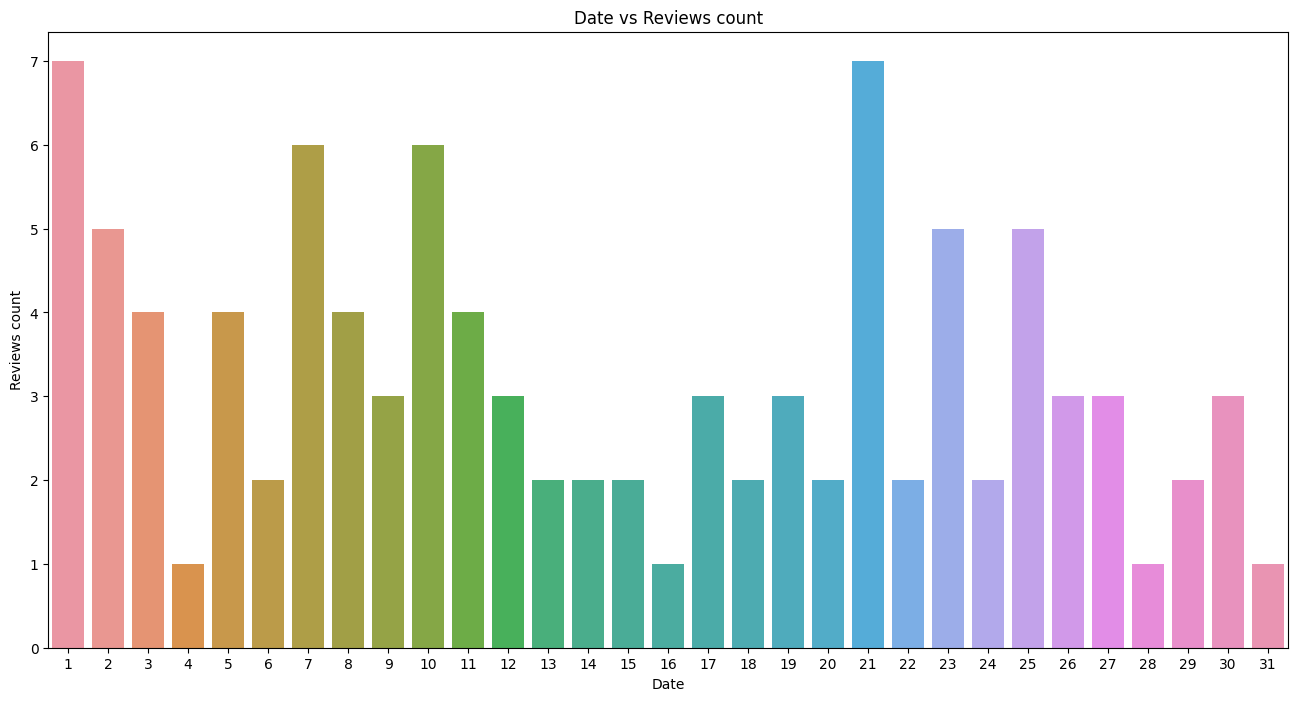

In [53]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

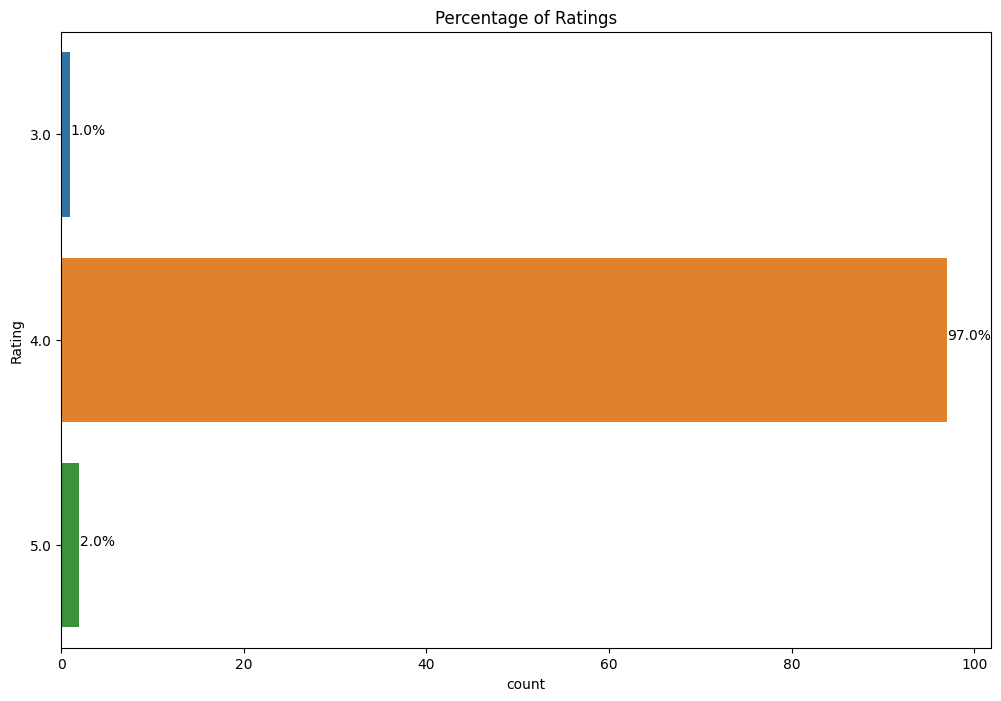

In [54]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [55]:
data = df[['Review']]
data

,Review
0,I purchase OnePlus phone on Amazon. Delivery w...
1,Very good and Stylish phone as compared to oth...
2,"Ok , so this phone is good but not best in seg..."
3,Phone performance is good but camera 📸 quality...
4,I purchased 3months ago. My camera clearity no...
...,...
95,Good
96,"Amazing phone , touch is good , speed is good ..."
97,I feel it's a balanced phone though still not ...
98,Nice product


In [56]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [57]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [58]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...


In [59]:
# A. Pre-processing 'Key Words'
#  Removing '@names'

In [60]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [61]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [62]:
# Removing links (http | https)

In [63]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [64]:
# Removing Review with empty text

In [65]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [66]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [67]:
# Reseting Index

In [68]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [69]:
# Removing Punctuations, Numbers and Special characters

In [70]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [71]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [72]:
# Function to remove emoji

In [73]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [74]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [75]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...,"[purchase, oneplus, phone, amazon, delivery, t..."
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...,"[phone, performance, good, camera, quality, up..."
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...,"[purchased, month, ago, camera, clearity, good..."
5,safe sound,I have it safe and sound,"[safe, sound]"
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...,"[product, good, compare, vivo, x, g, segment, ..."
7,value money,Value for money,"[value, money]"
8,okay budget mobile,Okay. Budget mobile,"[okay, budget, mobile]"
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues,"[good, performancegood, battery, lifeno, issue]"


In [78]:
#from nltk.tokenize import tokenized_tweets
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [ ]:
# With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for key_phrases sentiment analysis.

In [84]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
!git clone https://github.com/surajkadam727/Assignment.git

Cloning into 'Assignment'...
remote: Enumerating objects: 354, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 354 (delta 60), reused 78 (delta 36), pack-reused 229
Receiving objects: 100% (354/354), 37.66 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [118]:
import codecs
with codecs.open("/content/Assignment/Assignment 11/stop.txt") as s:
    stop = s.read()
    print(stop[:101])


a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all


In [119]:
stop.split(" ")

["a\na's\nable\nabout\nabove\naccording\naccordingly\nacross\nactually\nafter\nafterwards\nagain\nagainst\nain't\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\napart\nappear\nappreciate\nappropriate\nare\naren't\naround\nas\naside\nask\nasking\nassociated\nat\navailable\naway\nawfully\nb\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelieve\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nboth\nbrief\nbut\nby\nc\nc'mon\nc's\ncame\ncan\ncan't\ncannot\ncant\ncause\ncauses\ncertain\ncertainly\nchanges\nclearly\nco\ncom\ncome\ncomes\nconcerning\nconsequently\nconsider\nconsidering\ncontain\ncontaining\ncontains\ncorresponding\ncould\ncouldn't\ncourse\ncurrently\nd\ndefinitely\ndescribed\ndespite\ndid\ndidn't\ndifferent\ndo\ndoes\ndoesn't\ndoing\ndon't\ndone\ndown\ndownwards\nduring\ne\neach\nedu\neg\neight\n

In [120]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...
5,safe sound,I have it safe and sound
6,product good compare vivo x g segment product ...,Product is good but if we compare Vivo t2x5g s...
7,value money,Value for money
8,okay budget mobile,Okay. Budget mobile
9,good performancegood battery lifeno issue,Good performanceGood battery lifeNo issues


In [ ]:
#  Tokenize 'Clean_Reviews'

In [121]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['good', 'stylish', 'phone', 'compared', 'phone', 'function', 'like', 'iphone', 'india', 'poor', 'population', 'compared', 'foreign', 'country', 'think', 'people', 'india', 'able', 'buy', 'phone', 'brand', 'one', 'plus', 'minor', 'problem', 'phone', 'consumes', 'battery', 'fast', 'rest', 'battery', 'working', 'well', 'work', 'approximately', 'hour', 'charge', 'charge', 'phone', 'day', 'one', 'problem', 'battery', 'loss', 'early', 'otherwise', 'good', 'phone', 'suggest', 'indian', 'buy', 'phone', 'requesting', 'oneplus', 'increase', 'rate', 'phone', 'want', 'buy', 'buy', 'end', 'emi', 'segesst', 'one', 'plus', 'rate', 'equal', 'great', 'indian', 'festival', 'baught', 'one', 'fact', 'showed', 'oneplus', 'neighbour', 'impressed', 'want', 'buy', 'phone', 'budget', 'k', 'overall', 'full', 'mark', 'oneplus', 'great', 'product', 'gallary', 'oneplus', 'thank'])

In [122]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchase, oneplus, phone, amazon, delivery, t...
1    [good, stylish, phone, compared, phone, functi...
2    [ok, phone, good, best, segment, encounter, mi...
3    [phone, performance, good, camera, quality, up...
4    [purchased, month, ago, camera, clearity, good...
5                                        [safe, sound]
6    [product, good, compare, vivo, x, g, segment, ...
7                                       [value, money]
8                               [okay, budget, mobile]
9      [good, performancegood, battery, lifeno, issue]
Name: Clean_Reviews, dtype: object

In [ ]:
# Converting words to Stemmer

In [124]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")


In [125]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,purchas oneplus phone amazon deliveri time pho...
1,good stylish phone compar phone function like ...
2,ok phone good best segment encount minor bug l...
3,phone perform good camera qualiti upto mark lo...
4,purchas month ago camera cleariti good set
...,...
95,good
96,amaz phone touch good speed good everyth good ...
97,feel balanc phone though still best gamer phot...
98,nice product


In [ ]:
# Converting words to Lemma

In [126]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,purchase oneplus phone amazon delivery time ph...
1,good stylish phone compared phone function lik...
2,ok phone good best segment encounter minor bug...
3,phone performance good camera quality upto mar...
4,purchased month ago camera clearity good setting
...,...
95,good
96,amazing phone touch good speed good everything...
97,feel balanced phone though still best gamers p...
98,nice product


In [ ]:
# Applying bag of Words without N grams

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [129]:
print(cv.get_feature_names_out()[109:200])

['country' 'crash' 'crashing' 'current' 'curve' 'day' 'december' 'decent'
 'default' 'defective' 'dekhane' 'delete' 'delivery' 'depend'
 'description' 'design' 'desired' 'device' 'didnt' 'different' 'dislike'
 'display' 'download' 'drop' 'early' 'ease' 'easily' 'easy' 'edit' 'emi'
 'encounter' 'end' 'enthusiast' 'equal' 'even' 'everyday' 'everything'
 'excellent' 'exchange' 'expandable' 'expect' 'expected' 'expensive'
 'experience' 'extend' 'facebook' 'facility' 'fact' 'family' 'fast'
 'favorite' 'feature' 'feel' 'feeling' 'festival' 'final' 'find' 'fine'
 'finger' 'first' 'fixed' 'flag' 'flexible' 'foreign' 'found' 'frame'
 'free' 'friendly' 'front' 'full' 'function' 'gallary' 'game' 'gamers'
 'gaming' 'gb' 'gen' 'generally' 'gesture' 'get' 'getting' 'give' 'given'
 'glitch' 'go' 'going' 'good' 'google' 'got' 'grandchild' 'grandma']


In [130]:
print(cv.get_feature_names_out()[:100])

['aap' 'aapko' 'aati' 'ab' 'able' 'accustomed' 'achha' 'achhi'
 'achievable' 'achieve' 'actually' 'adapter' 'additional' 'adjust'
 'affordable' 'ago' 'also' 'always' 'amazing' 'amazon' 'android' 'app'
 'appreciated' 'approximately' 'apps' 'around' 'ask' 'aspect' 'automatic'
 'avarage' 'average' 'awesome' 'ayegi' 'background' 'backup' 'bahetar'
 'bahut' 'baki' 'balanced' 'batry' 'battery' 'baught' 'beautiful' 'became'
 'believe' 'besides' 'best' 'better' 'bettery' 'bgmi' 'bhi' 'big' 'bigger'
 'bit' 'bloatware' 'brand' 'breeze' 'brightness' 'browse' 'browsing'
 'budget' 'bug' 'build' 'burn' 'buy' 'calculator' 'calender' 'call'
 'calling' 'camara' 'camera' 'capturing' 'card' 'case' 'ce' 'certain'
 'chal' 'challenging' 'change' 'charge' 'charger' 'charging' 'charjing'
 'chizo' 'choose' 'clarity' 'clean' 'clear' 'clearity' 'close'
 'cluttering' 'color' 'colour' 'come' 'comfortable' 'compare' 'compared'
 'comparison' 'complaining' 'complex']


In [131]:
print(tweetscv.toarray()[100:200])

[]


In [ ]:
# CountVectorizer with N-grams (Bigrams & Trigrams)

In [132]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [133]:
corpus[3]

'phone perform good camera qualiti upto mark look like mp camera game use yet aspect ok'

In [134]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [135]:
X.shape

(100, 2683)

In [137]:
cv.get_feature_names_out()[:20]

array(['aap', 'aap latest', 'aap latest phone', 'aapko', 'aapko one',
       'aapko one plu', 'aati', 'aati hai', 'aati hai jabardast', 'ab',
       'ab ye', 'ab ye bhi', 'abl', 'abl buy', 'abl buy phone',
       'accustom', 'accustom certain', 'accustom certain gestur', 'achha',
       'achha rahta'], dtype=object)

In [140]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [142]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aap,aap latest,aap latest phone,aapko,aapko one,aapko one plu,aati,aati hai,aati hai jabardast,ab,...,year se jada,yet,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,yt,yt heat,yt heat issu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF Vectorizer

In [143]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [144]:
corpus[4]

'purchas month ago camera cleariti good set'

In [145]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [146]:
X.shape

(100, 2683)

In [148]:
tfidf_v.get_feature_names_out()[:20]

array(['aap', 'aap latest', 'aap latest phone', 'aapko', 'aapko one',
       'aapko one plu', 'aati', 'aati hai', 'aati hai jabardast', 'ab',
       'ab ye', 'ab ye bhi', 'abl', 'abl buy', 'abl buy phone',
       'accustom', 'accustom certain', 'accustom certain gestur', 'achha',
       'achha rahta'], dtype=object)

In [150]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aap,aap latest,aap latest phone,aapko,aapko one,aapko one plu,aati,aati hai,aati hai jabardast,ab,...,year se jada,yet,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.073541,0.073541,0.073541
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.163278,0.163278,0.163278,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
# Named Entity Recognition (NER)

In [151]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchase oneplus phone amazon delivery time phone g good camera latest android version g speed good jio network come w fast charging adapter battery good still need improvement app management battery health ram expandable upto gb glitch found using phone still need performance improvement phone uioverall k good option good stylish phone compared phone function like iphone india poor population compared foreign country think people india able buy phone brand one plus minor problem phone consumes battery fast rest battery working well work approximately hour charge charge phone day one problem battery loss early otherwise good phone suggest indian buy phone requesting oneplus increase rate phone want buy buy end emi segesst one plus rate equal great indian festival baught one fact showed oneplus neighbour impressed want buy phone budget k overall full mark oneplus great product gallary oneplus thank ok phone good best segment encounter minor bug like app crash idk happening performance 

In [152]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [153]:
for token in doc_block[:50]:
    print(token,token.pos_)

purchase VERB
oneplus NOUN
phone NOUN
amazon PROPN
delivery NOUN
time NOUN
phone NOUN
g NOUN
good ADJ
camera NOUN
latest ADJ
android ADJ
version NOUN
g PROPN
speed NOUN
good PROPN
jio PROPN
network PROPN
come VERB
w ADV
fast ADV
charging VERB
adapter NOUN
battery NOUN
good NOUN
still ADV
need VERB
improvement NOUN
app NOUN
management NOUN
battery PROPN
health NOUN
ram PROPN
expandable PROPN
upto PROPN
gb PROPN
glitch PROPN
found VERB
using VERB
phone NOUN
still ADV
need VERB
performance NOUN
improvement NOUN
phone NOUN
uioverall NOUN
k PROPN
good ADJ
option NOUN
good ADJ


In [154]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['drop', 'game', 'camera', 'camera', 'make', 'photo', 'colour', 'oversaturated', 'lens', 'camera', 'review', 'go', 'getting', 'k', 'keep', 'mind', 'display', 'good', 'get', 'p', 'heating', 'issue', 'battery', 'performance', 'budget', 'looking', 'brand', 'value', 'go', 'app', 'crashing', 'problem', 'fixed', 'update', 'phone', 'performance', 'camera', 'quality', 'upto', 'mark', 'look', 'camera', 'gaming', 'used', 'aspect', 'purchased', 'month', 'camera', 'clearity', 'good', 'setting', 'product', 'compare', 'vivo', 'segment', 'product', 'weight', 'performance', 'value', 'money', 'budget', 'mobile', 'battery', 'lifeno', 'issue', 'colour', 'battery', 'phone', 'phone', 'range', 'value', 'money', 'product', 'buy', 'value', 'money', 'work', 'charge', 'k', 'time', 'looking', 'got', 'issue', 'year', 'camera', 'average', 'phone', 'student', 'price', 'heating', 'issue', 'expected', 'counter', 'part', 'come', 'bloatware', 'laser', 'finger', 'print', 'camera']


In [155]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,46
1,camera,28
2,product,20
3,battery,16
4,quality,13
5,price,13
6,performance,12
7,day,10
8,time,9
9,issue,9


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

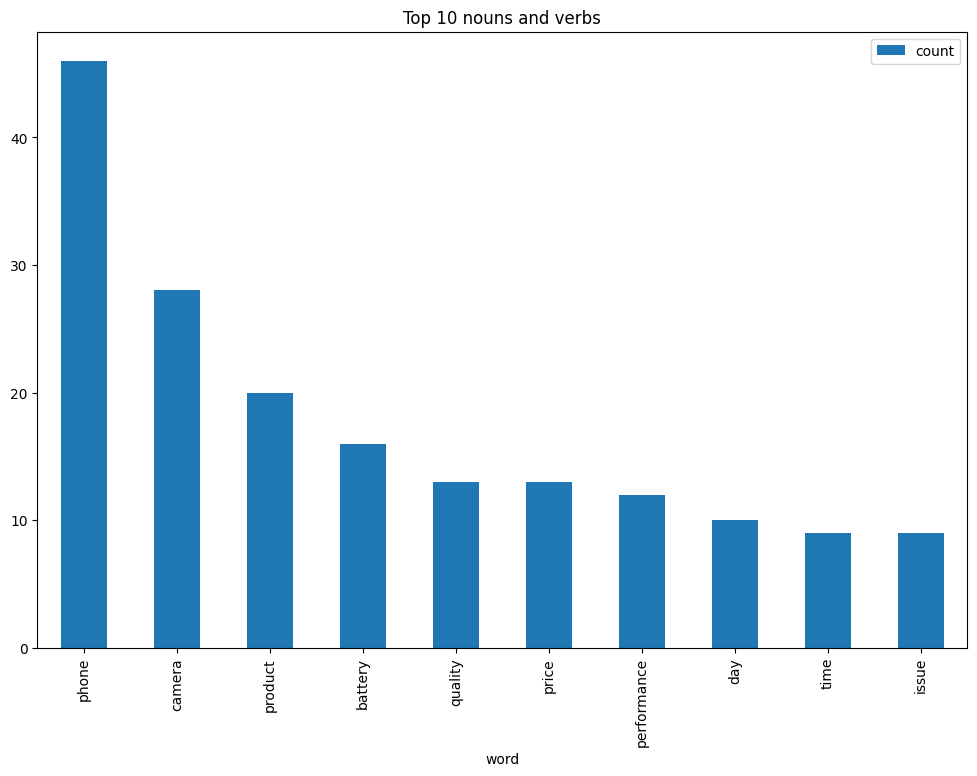

In [156]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [ ]:
# Feature Extraction for 'Key Words'

In [157]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [ ]:
# Fetch sentiments

In [158]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [159]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,99
neg,1


In [160]:
dataframe.Clean_Reviews[8]

'okay budget mobile'

In [161]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}

In [164]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,purchase oneplus phone amazon delivery time ph...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
1,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co..."
2,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co..."
3,phone performance good camera quality upto mar...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp..."
4,purchased month ago camera clearity good setting,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."


In [165]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,purchase oneplus phone amazon delivery time ph...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.9538
1,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co...",0.9612
2,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619
3,phone performance good camera quality upto mar...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.7650
4,purchased month ago camera clearity good setting,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404


In [166]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,purchase oneplus phone amazon delivery time ph...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.9538,Positive
1,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co...",0.9612,Positive
2,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619,Positive
3,phone performance good camera quality upto mar...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.7650,Positive
4,purchased month ago camera clearity good setting,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404,Positive
...,...,...,...,...
95,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
96,amazing phone touch good speed good everything...,"{'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'comp...",0.9595,Positive
97,feel balanced phone though still best gamers p...,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.8957,Positive
98,nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive


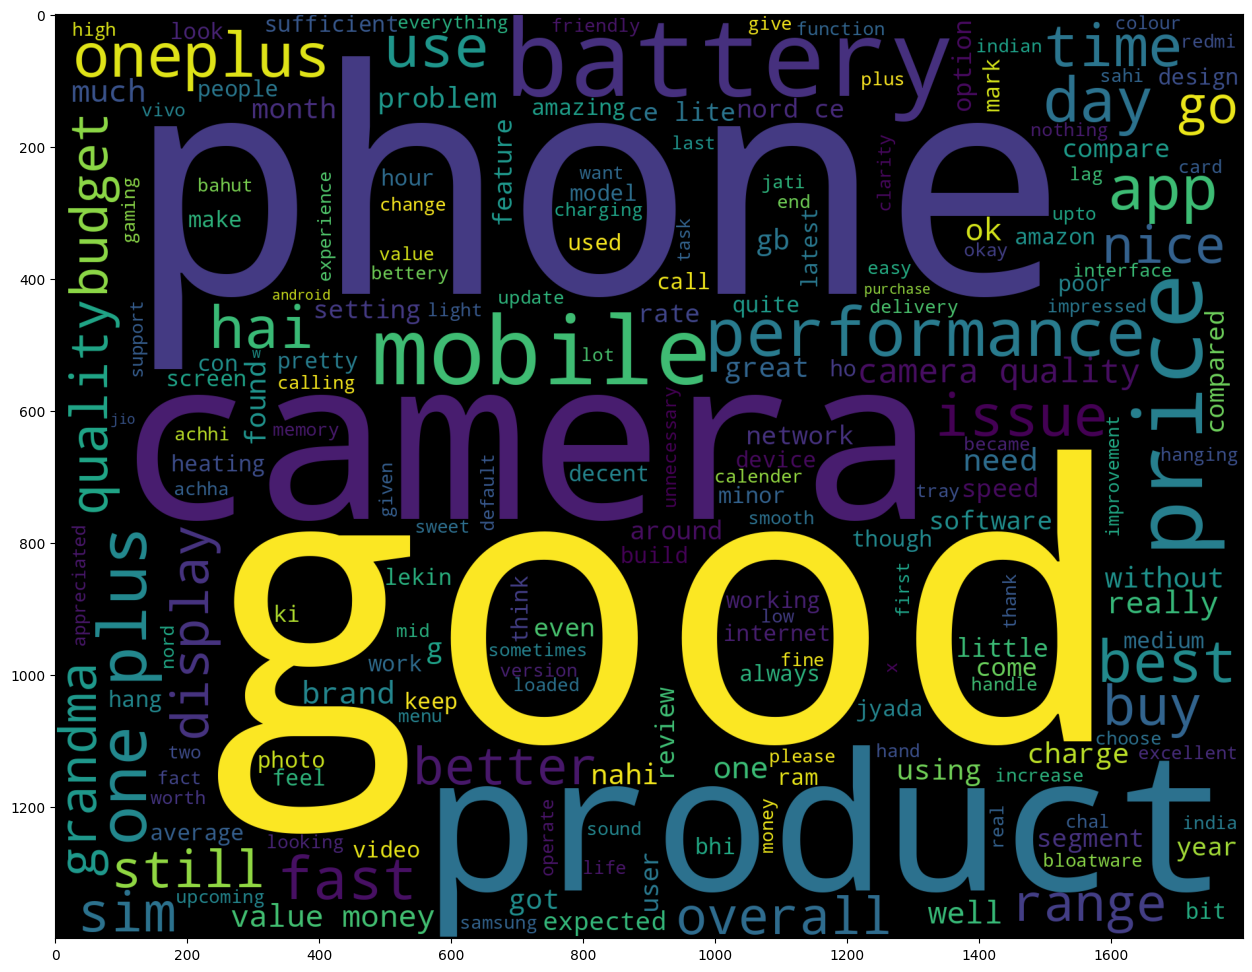

In [173]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [ ]:
# Most common words in positive Review

In [178]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("/content/Assignment/Assignment 11/negative-words.txt",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,sentiment
0,purchase oneplus phone amazon delivery time ph...,I purchase OnePlus phone on Amazon. Delivery w...,pos
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,pos
2,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...",pos
3,phone performance good camera quality upto mar...,Phone performance is good but camera 📸 quality...,pos
4,purchased month ago camera clearity good setting,I purchased 3months ago. My camera clearity no...,pos


In [174]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

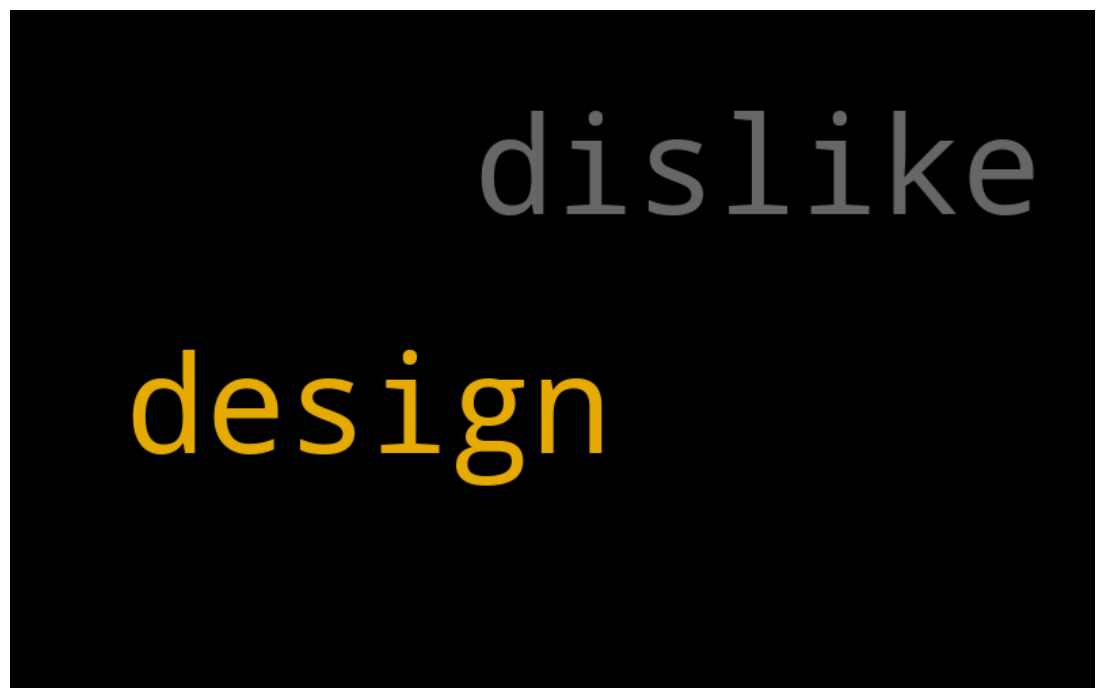

In [179]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)